<a href="https://colab.research.google.com/github/Deba951/Hyperspectral_Image_Analysis_Learning/blob/main/kernel_PCA%2BSVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation of Kernel PCA + SVM on indian Pines HSI

### Importing modules

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
# !pip install seaborn
import seaborn as sns
from sklearn.svm import SVC
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split

In [31]:
# import hvplot
# import hvplot.pandas
!pip install hvplot
# pd.options.plotting.backend = 'hvplot'
pd.set_option('plotting.backend', 'hvplot')

## Reading the data

In [32]:
df = pd.read_csv('Dataset.csv')

In [33]:
df.head()

,band-1,band-2,band-3,band-4,band-5,band-6,band-7,band-8,band-9,band-10,...,band-192,band-193,band-194,band-195,band-196,band-197,band-198,band-199,band-200,class
0,3172,4142,4506,4279,4782,5048,5213,5106,5053,4750,...,1094,1090,1112,1090,1062,1069,1057,1020,1020,3
1,2580,4266,4502,4426,4853,5249,5352,5353,5347,5065,...,1108,1104,1117,1091,1079,1085,1064,1029,1020,3
2,3687,4266,4421,4498,5019,5293,5438,5427,5383,5132,...,1111,1114,1114,1100,1065,1092,1061,1030,1016,3
3,2749,4258,4603,4493,4958,5234,5417,5355,5349,5096,...,1122,1108,1109,1109,1071,1088,1060,1030,1006,3
4,2746,4018,4675,4417,4886,5117,5215,5096,5098,4834,...,1110,1107,1112,1094,1072,1087,1052,1034,1019,3


In [34]:
X = df.iloc[:, :-1].values

y = df.iloc[:, -1].values

The above code is used to split the data into features (X) and labels (y). The `iloc` function is used to select the columns of the dataframe. The `:-1` slice is used to select all columns except the last column, which is the label column. The `values` attribute is used to convert the dataframe to a numpy array.

In [35]:
X.shape, y.shape

((21025, 200), (21025,))

## Implementing Kernel PCA

In [36]:
kpca = KernelPCA(n_components = 150, kernel='poly', eigen_solver='arpack')

principalComponents = kpca.fit_transform(X)

principalComponents.shape

(21025, 150)

The shape of the principalComponents will be (n_samples, n_components), where n_samples is the number of samples in the dataset and n_components is the number of principal components. In this case, n_components is 150.

## Dividing the reduced data into train and test

In [37]:
X_train, X_test, y_train, y_test, indices_train, indices_test  = train_test_split(principalComponents, y,  range(X.shape[0]),
                                                                                  test_size = 0.15, random_state = 11)

In [38]:
X_train.shape, X_test.shape

((17871, 150), (3154, 150))

## Implementing the Support Vector Machine(SVM) Classifier

Implementing the support vector machine classifier with Radial Basis Function(RBF) kernel.

In [39]:
svm = SVC(kernel='rbf', degree = 11, gamma='scale', cache_size=1024*7)
svm.fit(X_train, y_train)

SVC(cache_size=7168, degree=11)

This code creates a support vector machine (SVM) classifier and fits it to the training data.
The `SVC` class is used to create a SVM classifier. The `kernel` parameter specifies the type of kernel to use. In this case, the radial basis function (RBF) kernel is used.
The `degree` parameter specifies the degree of the polynomial kernel. The `gamma` parameter specifies the gamma parameter of the RBF kernel. The `cache_size` parameter specifies the size of the cache to use.
The `fit` method is used to fit the SVM classifier to the training data. The `X_train` parameter specifies the training data features. The `y_train` parameter specifies the training data labels.

In [40]:
y_pred = svm.predict(X_test)

In [41]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(f'Accuracy: {accuracy_score(y_test, y_pred)}%')

Accuracy: 0.7079898541534559%


The code you provided is used to evaluate the performance of a machine learning model. Specifically, it uses the `classification_report`, `confusion_matrix`, and `accuracy_score` functions from the `sklearn.metrics` module to calculate the accuracy, classification report, and confusion matrix of the model.
The `accuracy_score` function calculates the accuracy of the model, which is the percentage of correctly predicted labels. The `classification_report` function provides a detailed report of the model's performance, including the precision, recall, f1-score, and support for each class. The `confusion_matrix` function calculates the confusion matrix of the model, which is a table that shows the number of correctly and incorrectly predicted labels for each class.
The output of the code will be the accuracy of the model, the classification report, and the confusion matrix. This information can be used to evaluate the performance of the model and identify areas where it can be improved.

## Confusion Matrix

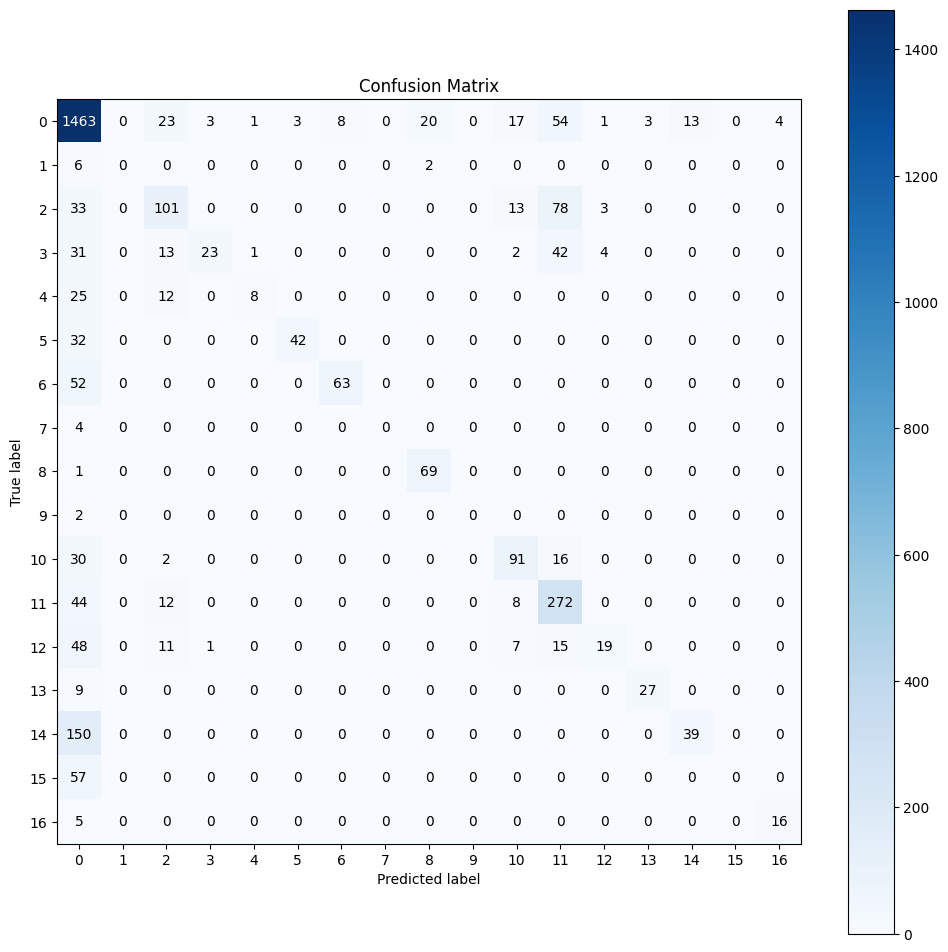

In [42]:
! pip install -q scikit-plot

import scikitplot as skplt

skplt.metrics.plot_confusion_matrix(
    y_test,
    y_pred,
    figsize=(12,12));

In [43]:
# !pip install plotly
import plotly.graph_objects as go

fig = go.Figure(data=go.Heatmap(
                   z= confusion_matrix(y_test, y_pred),
                   x=[f'class-{i}' for i in np.unique(df.loc[:, 'class'].values)],
                   y=[f'class-{i}' for i in np.unique(df.loc[:, 'class'].values)],
                   hoverongaps = False))
fig.show()

## Classification Report

In [44]:
# print(confusion_matrix(y_test,y_pred))
print('Classification report:\n',classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.73      0.91      0.81      1613
           1       0.00      0.00      0.00         8
           2       0.58      0.44      0.50       228
           3       0.85      0.20      0.32       116
           4       0.80      0.18      0.29        45
           5       0.93      0.57      0.71        74
           6       0.89      0.55      0.68       115
           7       0.00      0.00      0.00         4
           8       0.76      0.99      0.86        70
           9       0.00      0.00      0.00         2
          10       0.66      0.65      0.66       139
          11       0.57      0.81      0.67       336
          12       0.70      0.19      0.30       101
          13       0.90      0.75      0.82        36
          14       0.75      0.21      0.32       189
          15       0.00      0.00      0.00        57
          16       0.80      0.76      0.78        21

  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Overall Accuracy: 70.79898541534559%%

## Classification Map

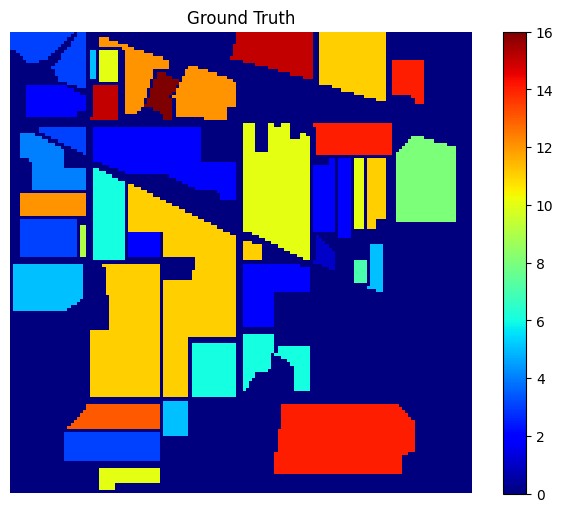

In [45]:
plt.figure(figsize=(8, 6))
plt.imshow(df.iloc[:, -1].values.reshape((145, 145)), cmap='jet')
plt.colorbar()
plt.axis('off')
plt.title('Ground Truth')
plt.savefig('ground_truth.png')
plt.show()

In [46]:
# !pip install tqdm
from tqdm import tqdm
pre = y_pred

clmap = [0]*X.shape[0]

for i in tqdm(range(len(indices_train))):
    clmap[indices_train[i]] = y[indices_train[i]]

for i in tqdm(range(len(indices_test))):
    clmap[indices_test[i]] = pre[i]

100%|██████████| 3154/3154 [00:00<00:00, 493760.63it/s]


The code you provided is used to create a confusion matrix for a machine learning model. The `tqdm` library is used to display a progress bar while the confusion matrix is being created. The `pre` variable is used to store the predicted labels of the model. The `clmap` variable is used to store the true labels of the data. The `indices_train` and `indices_test` variables are used to store the indices of the training and test data, respectively.
The code first creates a list of zeros with the same length as the number of data points. Then, it iterates through the training data and assigns the true labels to the corresponding indices in the `clmap` list. Next, it iterates through the test data and assigns the predicted labels to the corresponding indices in the `clmap` list. Finally, the `clmap` list is used to create a confusion matrix.
The output of the code will be a confusion matrix, which can be used to evaluate the performance of the machine learning model.

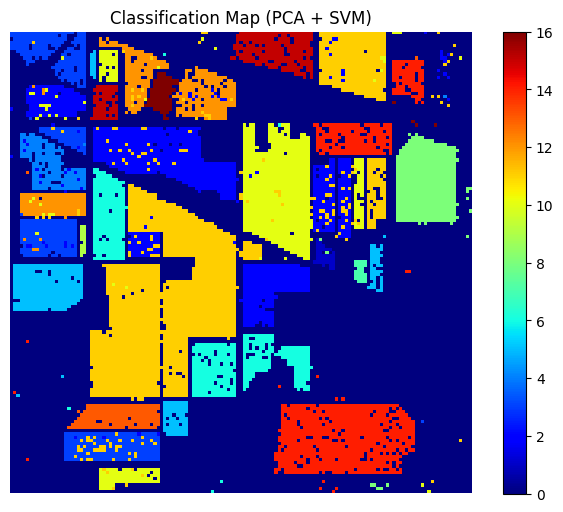

In [47]:
plt.figure(figsize=(8, 6))
plt.imshow(np.array(clmap).reshape((145, 145)), cmap='jet')
plt.colorbar()
plt.axis('off')
plt.title('Classification Map (PCA + SVM)')
plt.savefig('Classification_map.png')
plt.show()